## Observations and Insights
1. For the Drug Regimen Capomulin, there was a common trend of decreased tumor size over time.
2. There was a strong correlation between mouse weight and tumor size. This implies that tumor size is not independant of the size of the mouse, but rather a function of it.
3. Ramucane and Capomulin drug regimens had significantly lower final tumor volume size statistics.

In [209]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results,
               how='outer', on='Mouse ID')
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = merged_data[merged_data.duplicated(['Mouse ID','Timepoint'],keep=False)]
dupe.drop_duplicates(subset=['Mouse ID'], inplace=True)
dupe[['Mouse ID']]

C:\Users\hhhbh\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Mouse ID
908,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe = merged_data[merged_data.duplicated(['Mouse ID','Timepoint'],keep=False)]
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = merged_data[merged_data['Mouse ID'] !='g989']
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_summary = pd.DataFrame()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen = data.groupby('Drug Regimen')

groupby_summary['Mean'] = regimen['Tumor Volume (mm3)'].mean()
groupby_summary['Median'] = regimen['Tumor Volume (mm3)'].median()
groupby_summary['Variance'] = regimen['Tumor Volume (mm3)'].var()
groupby_summary['Standard Deviation'] = regimen['Tumor Volume (mm3)'].std()
groupby_summary['SEM'] = regimen['Tumor Volume (mm3)'].sem()
groupby_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen = data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_summary = pd.DataFrame(regimen)
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

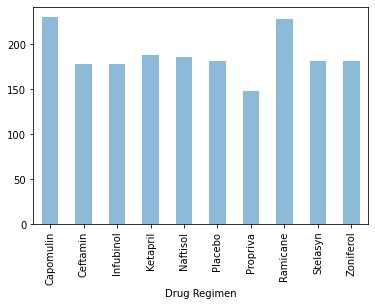

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_group = data.groupby('Drug Regimen')
time_count = time_group['Timepoint'].count()
time_count

bar_plt = time_count.plot(kind='bar',alpha=0.5)

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time_group = data.groupby('Drug Regimen')
time_count = time_group['Timepoint'].count().reset_index()
time_df = pd.DataFrame(time_count)

x_axis = np.arange(len(time_df))
x_ticks = [value for value in x_axis]
height = time_df['Timepoint']


Text(0.5, 1.0, 'Timepoints by Drug Regimen')

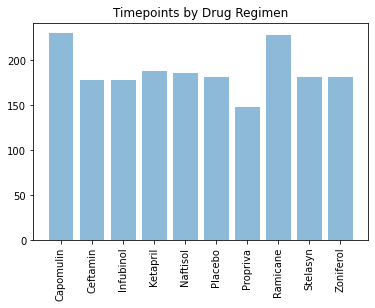

In [11]:
plt.bar(x_axis, height, alpha=0.5, align='center')
plt.xticks(x_ticks, time_df['Drug Regimen'], rotation='vertical')
plt.title('Timepoints by Drug Regimen')

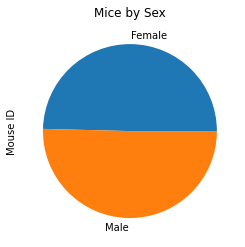

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = data.groupby(['Sex'])
sex_count = sex_group['Mouse ID'].nunique()
sex_pie_plt = sex_count.plot(kind='pie',
                             title='Mice by Sex')

([<matplotlib.patches.Wedge at 0x1bc7154b640>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

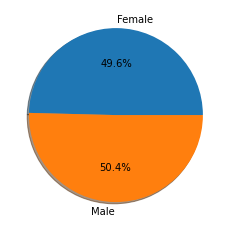

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count,
        labels=sex_count.index,
        autopct='%1.1f%%',
        shadow=True)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = data.groupby('Mouse ID').max()
mouse_tTime = mouse_group[['Timepoint']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tTime = pd.merge(mouse_tTime, data,
                       how='inner',
                       on=['Mouse ID','Timepoint'])
tTime = tTime[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
tTime = tTime[tTime['Drug Regimen'].isin(drug_list)]
tTime

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
238,y769,Ceftamin,45,68.594745
239,y793,Capomulin,45,31.896238
240,y865,Ceftamin,45,64.729837
244,z578,Ramicane,45,30.638696


In [120]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    tumor_vol = tTime[tTime['Drug Regimen']==drug]
    quartiles = tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'\n\nStats for {drug} ----------------------------')
    print(f"{drug} lower quartile: {lowerq}")
    print(f"{drug} upper quartile: {upperq}")
    print(f"{drug} interquartile range: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    lower_outlier = tumor_vol[tumor_vol['Tumor Volume (mm3)']<lower_bound]
    upper_outlier =tumor_vol[tumor_vol['Tumor Volume (mm3)']>upper_bound]
    if len(lower_outlier)>0:
        print(f'lower outlier found:\n{lower_outlier}')
    else:
        print('No lower outliers detected')
    if len(upper_outlier)>0:
        print(f'upper outlier found:\n{upper_outlier}')
    else:
        print('No upper outliers detected')



Stats for Capomulin ----------------------------
Capomulin lower quartile: 32.37735684
Capomulin upper quartile: 40.1592203
Capomulin interquartile range: 7.781863460000004
No lower outliers detected
No upper outliers detected


Stats for Ramicane ----------------------------
Ramicane lower quartile: 31.56046955
Ramicane upper quartile: 40.65900627
Ramicane interquartile range: 9.098536719999998
No lower outliers detected
No upper outliers detected


Stats for Infubinol ----------------------------
Infubinol lower quartile: 54.04860769
Infubinol upper quartile: 65.52574285
Infubinol interquartile range: 11.477135160000003
lower outlier found:
   Drug Regimen  Tumor Volume (mm3)
31    Infubinol           36.321346
No upper outliers detected


Stats for Ceftamin ----------------------------
Ceftamin lower quartile: 48.72207785
Ceftamin upper quartile: 64.29983003
Ceftamin interquartile range: 15.577752179999997
No lower outliers detected
No upper outliers detected


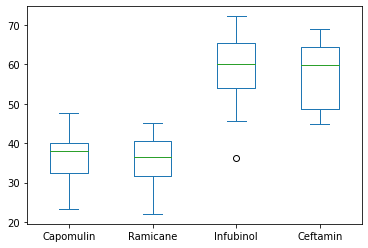

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
drugs = {}
for drug in drug_list:
    drugs[f'{drug}'] = tTime.loc[tTime['Drug Regimen']== drug,'Tumor Volume (mm3)'].tolist()
drugs_df = pd.DataFrame(drugs)
ax = drugs_df.plot.box()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

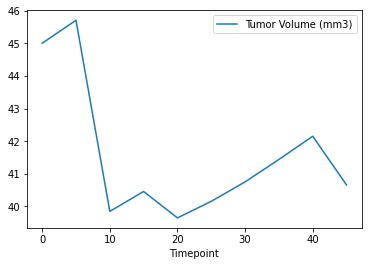

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

    #select a single mouse from data set filtered to Capomulin using sample function
cap_data = data[data['Drug Regimen']=='Capomulin']
mouse = cap_data.sample()

    # select all records for mouse selected from above by using sampled mouse ID
mouse_data = data[data['Mouse ID'] == mouse.iloc[0,0]]
mouse_data.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

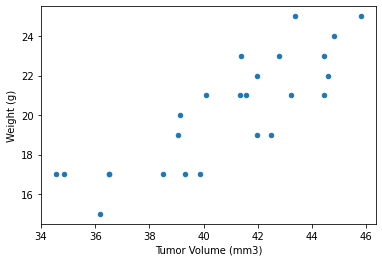

In [188]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = data[data['Drug Regimen']=='Capomulin']
mouse = cap_data.groupby('Mouse ID').mean()
mouse.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)')

## Correlation and Regression

Correlation coefficient: 0.8419363424694722
The r-squared is: 0.7088568047708723


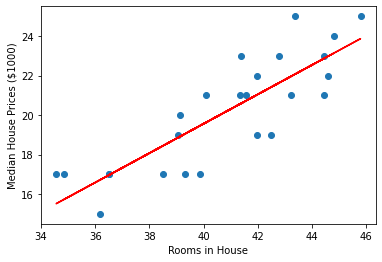

In [210]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print('Correlation coefficient: '+ str(mouse[['Tumor Volume (mm3)','Weight (g)']].corr().iloc[0,1]))

x_values = mouse['Tumor Volume (mm3)']
y_values = mouse['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
